# Packages Import

In [1]:
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import nltk 
import re
from nltk.corpus import stopwords
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import pickle
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import arabic_reshaper
import os
from stop_words import get_stop_words
from bidi.algorithm import get_display
from stop_words import get_stop_words
from farasa.pos import FarasaPOSTagger 
from farasa.ner import FarasaNamedEntityRecognizer 
from farasa.diacratizer import FarasaDiacritizer 
from farasa.segmenter import FarasaSegmenter 
from farasa.stemmer import FarasaStemmer
stemmer = FarasaStemmer()

# 1 - Business & data Understanding

In [2]:
data = pd.read_excel("new_data1.xlsx")
data.head()

,id,title,category_name
0,vFb-NHhy27o,Fornite or Call duty 🤔🤔🤔🤔,ألعاب
1,Svm9yokQoJs,كولف ديوتي 🤫,ألعاب
2,MFFDr8MFHuo,دين الاسلام دين الوسط كيف وسط بين ماذا وماذا ...,الدين
3,nR3sHfDGhwU,لعبة ثلاجة وفريزر - العاب اطفال تعليمية,ألعاب
4,2Y9QLffnl6g,Have you ever seen this animal up close? This ...,وثائقي


In [3]:
category_counts = data.category_name.value_counts()
category_names = category_counts.index.tolist()
category_values = category_counts.values.tolist()
category_counts

category_name
الدين     3438
ألعاب     2923
وثائقي    2725
Name: count, dtype: int64

This dataset includes : 
   <br> &emsp; * 9086 samples ; 
   <br> &emsp; * 3 classes which are وثائقي , ألعاب and الدين
   <br> &emsp; * Text located at the column with index of 2

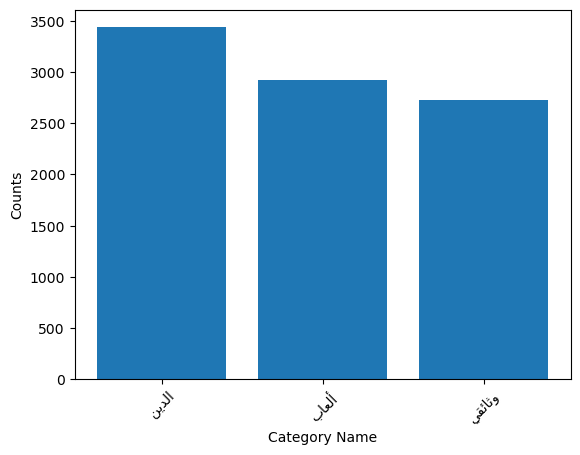

In [4]:
# Reshape and reorder the Arabic labels for proper display
reshaped_labels = [get_display(arabic_reshaper.reshape(label)) for label in category_names]
# Plot with bars
plt.bar(reshaped_labels, category_values)
plt.xlabel('Category Name')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

In [5]:
titles = data['title']  # Notice the double brackets
labels = data['category_name']
tiddy_features=[]
for i in titles: 
    # Remove special characters, retain Arabic letters and numbers
    tmp = re.sub(r'[^\u0600-\u06FF0-9]', ' ', str(i))
    # Remove numerical numbers
    tmp = re.sub(r'\d+', ' ', tmp)
    # Remove multiple spaces
    tmp = re.sub(r'\s+', ' ', tmp).strip()
    tiddy_features.append(tmp)
print(tiddy_features)
# Assuming 'labels' is a pandas Series, convert it to a list for manipulation

# Use zip to pair up tiddy_features and labels_list entries
paired_features_labels = list(zip(tiddy_features, labels))

# Filter out the pairs where the feature is an empty string
paired_features_labels = [(feature, label) for feature, label in paired_features_labels if feature]

# Unzip the pairs back into separate lists
tiddy_features, labels_list = zip(*paired_features_labels)

# Convert tuples back to lists (if you need lists)
tiddy_features = list(tiddy_features)
labels_list = list(labels_list)
       

['', 'كولف ديوتي', 'دين الاسلام دين الوسط كيف وسط بين ماذا وماذا الشيخ الشعراوى', 'لعبة ثلاجة وفريزر العاب اطفال تعليمية', '', 'لعبه كولف ديوتي جلد', 'أكبر السفن في العالم الشرق الوثائقية', '', 'لعبت قيم فورت نايت كامل باصغر كيبورد في العالم', 'وثائقي سباق التسلح حاملات الطائرات', 'اكتشاف المجهول الأمازون خفايا مخلوقات الأمازون الجزء الأول', 'وثائقي سطانلي متورط في تهريب الممنوعات', 'دلائل عقلية تثبت أن دين الاسلام هو دين الحق', 'شروط الزكاة وزكاة الحرث كتاب الزكاة شرح ابن عاشر نايف آل الشيخ مبارك', 'ما حكم إرسال أموال الزكاة لأهل غزة؟ الدكتور محمد الصغير يُجيب', 'التلفزيون العربي وثائقي رحلة الموت', 'سباق دراجات ألعاب', 'الاحد الاول من الصوم الكبير احد الكنوز لا تكنزوا ابونا لوقا سيداروس', 'تعريب لعبة فار كراي بريميل ب الترجمه العربي الكامله حورات و نصوص و قوام', 'اساسيات الحياة الروحية الصوم ابونا داود لمعي اجتماع خدام الانبا ابرام الثلاثاء مارس', '', 'هل الرعاف يفسد الصوم ؟ الشيخ وليد السعيدان الرعاف', '', 'السعوديه عام م هجري فيلم وثائقي إنتاج أوروبي عيد الحربي رحمه الله وعبدالله ا

In [6]:
print(tiddy_features[0])
stemmed_text = stemmer.stem(tiddy_features[0])                                     
print(stemmed_text)

كولف ديوتي
لف ديوتي


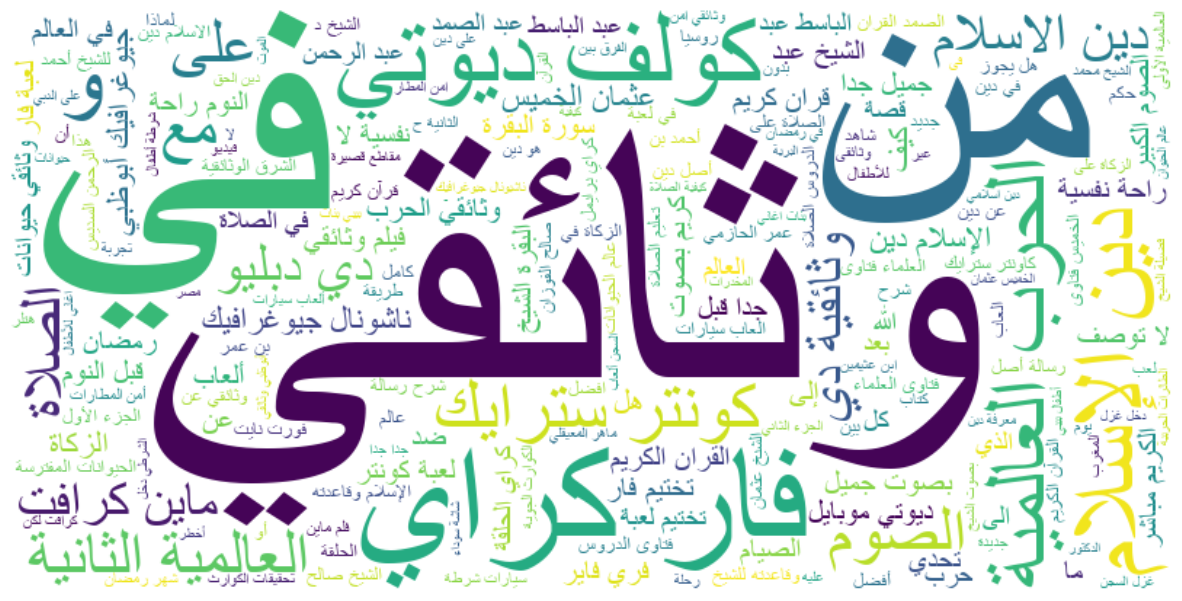

In [7]:
# Combine all text items into a single string and reshape
combined_text = ' '.join(tiddy_features)
reshaped_text = arabic_reshaper.reshape(combined_text)
bidi_text = get_display(reshaped_text)  # For right-to-left (RTL) languages

# Define a font that supports Arabic characters
font_path = "C:\\Windows\\Fonts\\arial.ttf"  # Escape backslashes for Windows paths

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(bidi_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [8]:
arabic_stop_words = get_stop_words('arabic')

vectorizer = TfidfVectorizer(max_features=2000, min_df=7, max_df=0.8, stop_words=arabic_stop_words)
X=vectorizer.fit_transform(tiddy_features).toarray()


In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,labels_list,test_size=0.2)

In [10]:
#Inialisation of ML Algorithms
model=MLPClassifier(hidden_layer_sizes=(100,150),activation='logistic',solver='adam')
gnb = GaussianNB()
linear_sm=SVC(kernel='linear',probability=True)
rbf_svm=SVC(kernel='rbf',probability=True)
sgd_svm=SVC(kernel='sigmoid',probability=True)
poly_svm =SVC(kernel='poly',degree=2,probability=True)


In [11]:
#Training of Ml Algorithms
model.fit(X_train,y_train)
gnb.fit(X_train,y_train)
linear_sm.fit(X_train,y_train)
rbf_svm.fit(X_train,y_train)
sgd_svm.fit(X_train,y_train)
poly_svm.fit(X_train,y_train)

SVC(degree=2, kernel='poly', probability=True)

In [12]:
#Predection
y_pred_model=model.predict(X_test)
y_pred_gnb=gnb.predict(X_test)
y_pred_linear_sm=linear_sm.predict(X_test)
y_pred_rbf_svm=rbf_svm.predict(X_test)
y_pred_sgd_svm=sgd_svm.predict(X_test)
y_pred_poly_svm=poly_svm.predict(X_test)

In [13]:
print("**************** Performance Evaluation of MLPClassifier  ****************")
print(classification_report(y_test,y_pred_model))
print()
print("****************    Performance Evaluation of NaiveBayes  ****************")
print(classification_report(y_test,y_pred_gnb))
print()
print("****************    Performance Evaluation of Linear SVM  ****************")
print(classification_report(y_test,y_pred_linear_sm))
print()
print("****************    Performance Evaluation of RBF SVM     ****************")
print(classification_report(y_test,y_pred_rbf_svm))
print()
print("****************    Performance Evaluation of SGD SVM     ****************")
print(classification_report(y_test,y_pred_sgd_svm))
print()
print("**************** Performance Evaluation of Polynomial SVM ****************")
print(classification_report(y_test,y_pred_poly_svm))
print()

**************** Performance Evaluation of MLPClassifier  ****************
              precision    recall  f1-score   support

       ألعاب       0.95      0.96      0.96       493
       الدين       0.98      0.99      0.98       658
      وثائقي       0.97      0.95      0.96       479

    accuracy                           0.97      1630
   macro avg       0.97      0.97      0.97      1630
weighted avg       0.97      0.97      0.97      1630


****************    Performance Evaluation of NaiveBayes  ****************
              precision    recall  f1-score   support

       ألعاب       0.91      0.94      0.92       493
       الدين       0.95      0.97      0.96       658
      وثائقي       0.96      0.90      0.93       479

    accuracy                           0.94      1630
   macro avg       0.94      0.94      0.94      1630
weighted avg       0.94      0.94      0.94      1630


****************    Performance Evaluation of Linear SVM  ****************
           

In [14]:
pickle.dump(vectorizer,open('vectorizer.pickle',"wb"))
pickle.dump(rbf_svm,open('bestModel.pickle',"wb"))